# Analysis of Employee Exit Survey Responses

In this project, I'm a Data Analyst tasked with cleaning and analyzing Employee Exit Survey responses from employees of [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland) (DETE), and the [Technical and Further Education](https://en.wikipedia.org/wiki/TAFE_Queensland) (TAFE) body of the Queensland government in Australia. The DETE exit survey data can be [found here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey), and the TAFE exist survey data can be [found here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey).

Specifically, we're looking to gain answers to the following questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We're recquired to combine the results for both surveys to answer the above questions. However, although both used the same survey template, one of them customized some of the answers - something that will introduce some complications into our work.

We'll start by reading the datasets into pandas, and then beginning an initial round of exploration.

## Reading in the Datasets

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv')

tafe_survey = pd.read_csv('tafe_survey.csv')

pd.options.display.max_columns = 150 #(to avoid truncated output)
print(dete_survey.info())
print('\n')
print(dete_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [2]:
print(tafe_survey.info())
print('\n')
print(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

Some preliminary observations can be made from the datasets above. 

1. Both the `tafe_survey` and `dete_survey` contain columns that are entirely unnecessary to the objectives of our analysis.
2. Some columns are essentially duplicates of each other, except that they have similar names. 
3. The `dete_survey` dataframe contains string values of 'Not Stated', to signifiy that a value wasn't entered, in place of the 'NaN' that one might expect.
4. There are numerous columns in which an ex-employee specified that their reason for leaving was dissatisfaction. 

Now, the `dete_survey.csv` file will be read into pandas again, but this time the `Not Stated` values will be read in as `NaN`. 

In [3]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

We'll also drop columns from each of the 2 dataframes that won't be necessary in our analysis.

In [4]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [5]:
print(tafe_survey_updated.columns)
print('\n')
print(dete_survey_updated.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

Right now we have columns in both dataframes that represent the same information, but have different names.

For example, the column that tracks the participant's identity is called `ID` in the `dete_survey` dataframe, and `Record ID` in the `tafe_survey` dataframe. 

Column names thus need to be standardized across both datasets.

## Re-naming Columns

For the dete_survey_updated columns, the following changes will be made:
- Capitalization will be made lowercase
- Spaces will be replaced with underscores
- Trailing whitespace from the end of the strings will be removed

In [6]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_').str.strip()

print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


Some `tafe_survey_updated` column names will also be altered to match the column names of the `dete_survey_updated` dataframe, as per the dictionary seen below:

In [7]:
renaming_dict = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(renaming_dict, axis = 1)

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Further cleaning of Data

We'll only need data of survey responders for whom the 'separationtype' is listed as 'Resignation'.

In [8]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [9]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

We see above that in the `dete_survey_updated` dataframe, there are multiple separation types under 'Resignation':
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

We'll have to account for these variations so data is not accidentally dropped.

In [10]:
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

dete_resignations = dete_survey_updated.loc[dete_survey_updated['separationtype'] == 'Resignation'].copy()

print(tafe_resignations['separationtype'].unique())
print('\n')
print(dete_resignations['separationtype'].unique())

['Resignation']


['Resignation']


After renaming all variations of Resignation values in `dete_survey_updated` to 'Resignation', we managed to isolate all rows that correspond to employees who resigned.

## Double-checking data for inconsistencies

In this step, we'll focus on making sure that the years in the `cease_date` and `dete_start_date` columns make sense. 

For instance, since the `cease_date` column indicates the employee's last year of employment, and `dete_start_date` is their first year of employment, it wouldn't make sense if the start date was after the cease date. 

We also know that most of the people in this field start working in their 20s, which means that a start date before the year 1940 is most likely an incorrect entry.

In [11]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
09/2010      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

We see above that the `cease_date` column in `dete_resignations` is listed in two formats:

- YYYY
- MM/YYYY

We'll use vectorized string methods to extract the year, and then later convert the type to a float.

In [12]:
dete_resignations['cease_date'] = (dete_resignations['cease_date']
                                   .str.extract(r'([1-2][0-9]{3})').astype(float))

print(dete_resignations['cease_date'].value_counts())

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [13]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

At first glance, it doesn't look like there are many dates that could be incorrectly entered in the `dete_resignations` dataframe. 

Now, let's see the `cease_date` column in `tafe_resignations`.

In [14]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

We note that the years in both dataframes aren't completely aligned. The `tafe_resignations` dataframe contains some cease dates in 2009, but the `dete_resignations` dataframe doesn't. 

The `tafe_resignations` dataframe also has quite a few more cease dates in 2010 than the `dete_resignations` dataframe.

Because we aren't interested in analyzing the results by year, we'll leave them as they are. 

## Creating new Columns

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

The `tafe_resignations` dataframe already contains a `institute_service` column that measures their years of service. In order to analyze both survey results together, we'll need to make a corresponding `institute_service` column in the `dete_resignations` dataframe. 

We can calculate the length of time the employee spent in service by substracting their employment start date from their cease date. 

In [15]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

## Identifying Dissatisfied Employees

Now, we'll identify employees who cited dissatisfaction as one of their reasons for resigning. 

We'll use the following columns from each dataframe.

tafe_resignations:
- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

dete_resignations:
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

If any employee indicates that they were dissatisfied in any one of the above categories at all, they'll be marked `dissatisfied` in a separate column. This new column will thus contain only one of 3 values:

- `True`: Employee was dissatisfied over one of more things, leading to their resignation
- `False`: Employee resigned for a reason other than dissatisfaction
- `NaN`: Missing Value

In [16]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [17]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We'll update the values in the above 2 columns now such that either 'True', 'False', or 'NaN' is reflected in their values.

This will be done by writing a function that does that.

In [18]:
def update_vals(element):
    if element == '-':
        return False
    elif pd.isnull(element):
        return np.nan
    else:
        return True
    
# Creating 'dissatisfied' column for tafe_resignations:    
tafe_resignations[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']] = (
tafe_resignations[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']]
    .applymap(update_vals))
    
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']].any(1, skipna=False)

tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [19]:
# Creating 'dissatisfied' column for dete_resignations: 
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the 2 dataframes

Thus far, we've performed the following tasks:

- Renamed columns to standardize column names where appropriate.
- Dropped data we didn't need.
- Made sure there was no invalid data.
- Created an `institute_service` column to measure the duration of employment.
- Cleaned the `Contributing Factors` columns considerably.
- Created a new column, `dissatisfied`, that measured if an employee resigned because they were dissatisfied in one way or another. 

With all this in view, we'll now proceed to combine both our datasets. 

We'll first add a column to each dataframe so we can easily distinguish between the two.

In [20]:
dete_resignations_up = dete_resignations
tafe_resignations_up = tafe_resignations

dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [21]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

combined.head()

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,Contributing Factors. Study,Contributing Factors. Travel,Institute,WorkArea,aboriginal,age,business_unit,career_move_to_private_sector,career_move_to_public_sector,cease_date,classification,dete_start_date,disability,dissatisfaction_with_the_department,dissatisfied,employment_conditions,employment_status,gender,id,ill_health,institute,institute_service,interpersonal_conflicts,job_dissatisfaction,lack_of_job_security,lack_of_recognition,maternity/family,nesb,none_of_the_above,physical_work_environment,position,region,relocation,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-40,NaN,True,False,2012.0,Primary,2005.0,NaN,False,False,False,Permanent Full-time,Female,4.0,False,DETE,7,False,False,False,False,False,NaN,False,False,Teacher,Central Queensland,False,NaN,2006.0,Resignation,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-45,Education Queensland,True,False,2012.0,NaN,1994.0,NaN,False,True,True,Permanent Full-time,Female,6.0,False,DETE,18,False,False,False,False,True,NaN,False,False,Guidance Officer,Central Office,False,NaN,1997.0,Resignation,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,True,False,2012.0,Secondary,2009.0,NaN,False,False,False,Permanent Full-time,Female,9.0,False,DETE,3,False,False,False,False,False,NaN,False,False,Teacher,North Queensland,False,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46-50,NaN,False,False,2012.0,NaN,1997.0,NaN,True,True,False,Permanent Part-time,Female,10.0,False,DETE,15,True,True,False,False,False,NaN,False,False,Teacher Aide,NaN,False,NaN,2008.0,Resignation,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,False,False,2012.0,Secondary,2009.0,NaN,False,False,False,Permanent Full-time,Male,12.0,False,DETE,3,False,False,False,False,True,NaN,False,False,Teacher,Far North Queensland,True,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False


We still have some columns in the dataframe that are unnecessary for our analysis. 

We'll thus drop any columns with less than 500 non-null values.

In [22]:
combined_updated = combined.dropna(thresh=500, axis = 1)

combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

In [23]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation


## Further cleaning of `institute_service` column

Right now one thing currently setting us back is that the `institute_service` column has values stored in different forms.

In [24]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


To analyze the data, these numbers will be converted into 4 categories:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company


In [25]:
extracted_years = (combined_updated['institute_service']
                  .astype(str).str.extract(r'(\d+)')
                  .astype('float'))

combined_updated['institute_service_up'] = extracted_years

combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

Next, we'll map each of the above values to one of the career stage definitions defined above.

In [26]:
def career_stage(element):
    if element < 3:
        return 'New'
    elif 3 <= element < 7:
        return 'Experienced'
    elif 7 <= element < 11:
        return 'Established'
    elif pd.isnull(element):
        return np.nan
    else:
        return 'Veteran'
    
# Apply this function to `institute_service_up` and store the results in `service_cat`.

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(career_stage)

combined_updated['service_cat'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Analysis

Now that we've created a `service_cat` column that describes an employee's duration of employment in a uniform fashion, we can begin the analysis.



In [27]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

Since the most common value is `False`, the missing values will thus be replaced with `False`.

In [28]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Gauging Employee Dissatisfaction by Career Stage

In [29]:
dissatisfied_pivot = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Sorting the dissatisfaction average in ascending order:
dissatisfied_pivot = dissatisfied_pivot.sort_values('dissatisfied')

dissatisfied_pivot

,dissatisfied
service_cat,
New,0.295337
Experienced,0.343023
Veteran,0.485294
Established,0.516129


We'll plot the above pivot table into a bar chart.

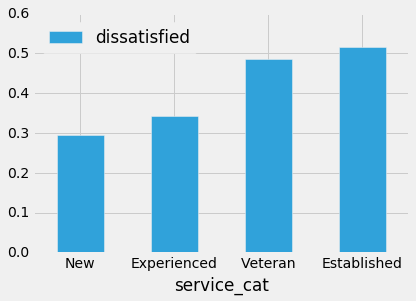

In [37]:
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')

dissatisfied_pivot.plot(kind='bar', rot =0)

The graph above suggests that the longer an employee works, the more likely they are to resign citing dissatisfaction with something. 

Employees with less than 3 years of work experience cite dissatisfaction only 30% of the time when resigning, while those who worked 4-7 years cited dissatisfaction 35% of the time. 

In contrast, those with 7 years or more of work experience reported being dissatisfied about 50% of the time when they resigned.

### Employee Dissatisfaction by Age

We'll go about attempting to answer the question of whether younger or older employees are more likely to cite dissatisfaction as a reason for leaving. 

First, the `Age` column will have to be cleaned.

In [31]:
combined_updated['age'].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [32]:
extracted_age = (combined_updated['age']
                  .astype(str).str.extract(r'(\d+)')
                  .astype('float'))

combined_updated['age'] = extracted_age
extracted_age.value_counts(dropna = True)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In a similar vein as the categorizing of career stage that was done before, we'll define a function that maps out a person's age into age groups:

- 21 or less
- 21-25
- 26-30
- 31-35
- 36-40
- 41-50
- 51-60
- Above 60

Since the missing values here can't be filled to a specific value (since they would skew that age category a lot), they will simply be ignored. A significant amount of data is not being lost as the missing age values only make up about 10% of the total amount of values.

In [33]:
def age_categories(element):
    if element < 21:
        return '21 or less'
    elif 21 <= element < 25:
        return '21-25'
    elif 25 <= element < 30:
        return '26-30'
    elif 30 <= element < 35:
        return '31-35'
    elif 35 <= element < 40:
        return '36-40'
    elif 40 <= element < 45:
        return '41-50'
    elif 50 <= element < 60:
        return '51-60'
    else:
        return 'Above 61'
    
combined_updated['age_category'] = combined_updated['age'].apply(age_categories)

print(combined_updated['age_category'].value_counts())

dissatisfied_age = combined_updated.pivot_table(index='age_category', values='dissatisfied')

dissatisfied_age = dissatisfied_age.sort_index()

print(dissatisfied_age)

Above 61      159
51-60         126
41-50          93
36-40          73
26-30          67
21-25          62
31-35          61
21 or less     10
Name: age_category, dtype: int64
              dissatisfied
age_category              
21 or less        0.200000
21-25             0.306452
26-30             0.417910
31-35             0.377049
36-40             0.342466
41-50             0.376344
51-60             0.404762
Above 61          0.358491


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


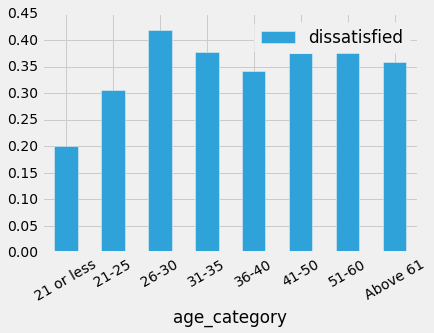

In [41]:
dissatisfied_age.plot(kind='bar', rot =30)

The overall trend observed based on Age groups here is somewhat similar to the outcome observed with Career Stages from above.

In general, older employees seem to be more likely to resign reporting dissatisfaction. This trend is fairly consistent across all age groups, apart from the 26-30 and 31-35 age groups.

### Employee Dissatisfaction by Institute

It's worth attempting to figure out whether the difference in dissatisfaction rates between the two initial datasets, `tafe_survey` and `dete_survey` is significant. 

Since we already have an `institute` column, this will be very straightforward to figure out.

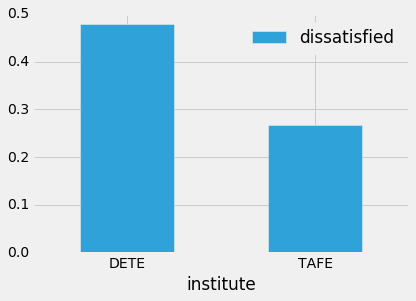

In [48]:
dissatisfied_institute = (combined_updated.
                          pivot_table(index='institute',
                                      values = 'dissatisfied'))

dissatisfied_institute.plot(kind='bar', rot = 0)

We notice that, at first glance, there appears to be a remarkable difference in the repored dissatisfaction rates of employees from the DETE and the TAFE firms.

However, there is a very easy explanation for this discrepancy.

Recall that there were several more columns from the dete survey forms that corresponded to employee dissatisfaction. The columns we used to measure dissatisfaction from each dataset were the following:

tafe_resignations:
- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

dete_resignations:
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

The observed increased dissatisfaction results in the DETE survey results could simply be explained by the fact that there were more options to choose from that represented dissatisfaction.

## Conclusion

To conclude, we can fairly conclusively say that employees who've been at an institute longer are by far more likely to resign citing dissatisfaction.

This trend is also somewhat reflected by age group, with older employees being more likely to report dissatisfaction. It should be noted that employees in the 26-35 age groups don't fit this trend, as they have some of the highest dissatisfaction rates. 

While it might also ostensibly appear like employees of the DETE institute might be more likely to resign reporting dissatisfaction, that trend seems much better explained by the fact that there were simply more survey answers that corresponded to a 'dissatisfied' outcome in the results of the DETE survey. This unequalness in the way the survey results of both institutes were handled is one limitation that was observed in this project. 

Another notable limitation is that dissatisfaction results were merely handled as a binary 'dissatisfied' or 'not dissatisfied', as opposed to, for instance, having employees rate their dissatisfaction on a scale of 1-10. The latter might have reflected employee sentiment more accurately, as it represents a spectrum of satisfaction that tends to correspond better to a person's actual feelings.